# Heart Disease Dataset - Exploratory Data Analysis (EDA)

### Dataset Overview
This dataset contains medical records of 1025 patients. It includes features related to:
* Demographic: `age`, `sex` (1 = male, 0 = female)
* Chest pain types: `cp`
* Resting blood pressure: `trestbps`
* Serum Cholestoral in mg/dl: `chol`
* Fasting blood sugar > 120 mg/dl: `fbs`
* Resting electrocardiographic (ECG) results: `restecg`
* Maximum heart rate achieved: `thalach`
* Exercise induced angina: `exang`
* ST depression induced exercise relative to rest: `oldpeak`
* Slope of the peak exercise of ST segment: `slope`
* Number of major vessels colored by fluoroscopy: `ca`
* Thalassemia: `thal` (0 = normal, 1 = fixed defect, 2 = reversable)
* Heart disease diagnosis: `target` (0 = No disease, 1 = Disease)

### Objective
The goal of this analysis is to:
* Understand patient demographics
* Analyze key medical indicators
* Explore relationships between features and heart disease
* Identify patterns that can guide predictive modeling

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid")

### Load the Dataset
We will load the dataset and inspect the first few rows to understand its structure.

In [4]:
# Load the dataset
df = pd.read_csv('../Data/heart.csv')

# Inspect the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Dataset Shape and Info
We check the number of records, columns, data type, and missing values

In [5]:
# Dataset Shape
print("Dataset Shape: ", df.shape)

# Column info and datatypes
df.info()

# Check for missing values
df.isnull().sum()

Dataset Shape:  (1025, 14)
<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statistical Summary
Review the basic statistics of numerical features to understand ranges, averages, and distributions

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Sex Distribution
Understanding male/female distribution

Text(0, 0.5, 'Count')

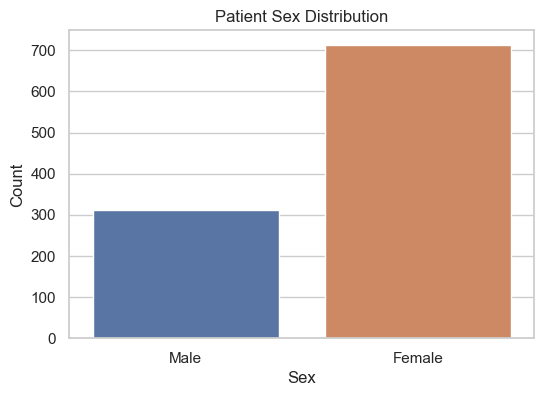

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=df, hue="sex", legend=False)
plt.xticks(ticks=[0,1], labels=["Male", "Female"])
plt.title("Patient Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")

### Age Distribution
Exploring the distribution of patient ages

Text(0, 0.5, 'Number of Patients')

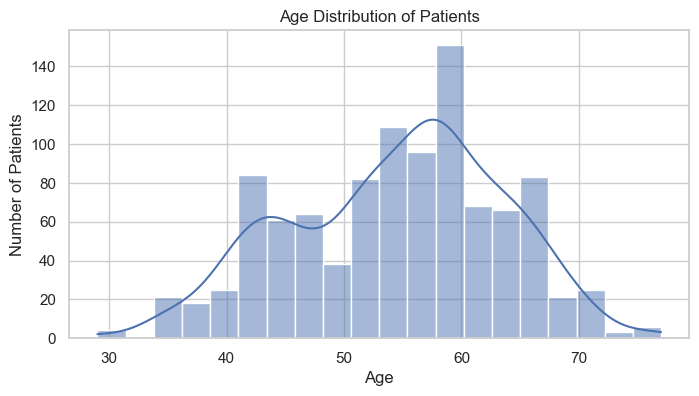

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

### Target Variable Distribution
Number of patients with and without heart disease

(300.0, 550.0)

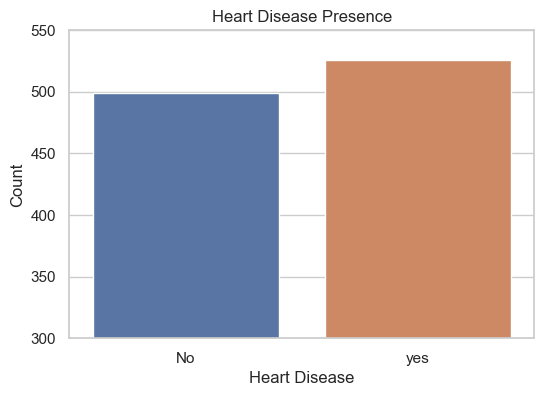

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, hue="target", legend=False)
plt.xticks(ticks=[0,1], labels=["No", "yes"])
plt.title("Heart Disease Presence")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.ylim(300, 550)

### Chest Pain Type Distribution
Explore types of chest pain (`cp`) among patients

Text(0, 0.5, 'Count')

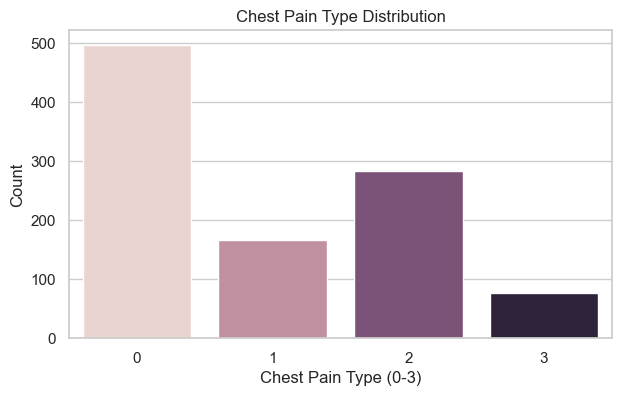

In [32]:
plt.figure(figsize=(7,4))
sns.countplot(x="cp", data=df, hue="cp", legend=False)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")

### Age vs Heart Disease
Check how age correlates with the presence of heart disease

Text(0, 0.5, 'Count')

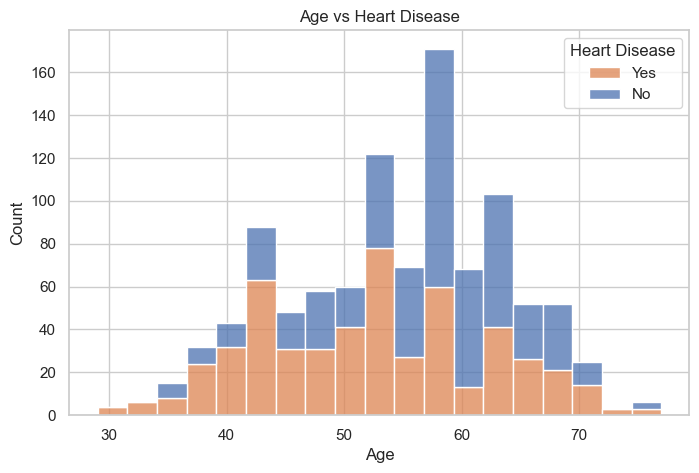

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue="target", multiple="stack")
plt.legend(title="Heart Disease", labels=["Yes", "No"])
plt.title("Age vs Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")

### Chest Pain Type vs Heart Disease
Do certain chest pain types indicate higher risk?

([<matplotlib.axis.XTick at 0x128e8b4d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

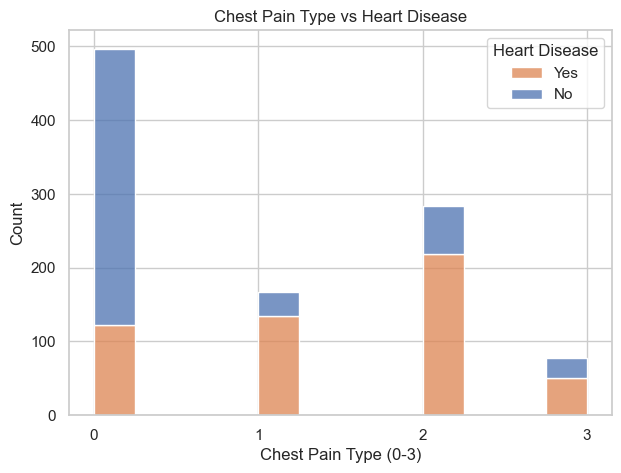

In [46]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="cp", hue="target", multiple="stack")
plt.legend(title="Heart Disease", labels=["Yes", "No"])
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(0,4,1))

### Blood Pressure vs Heart Disease
Compare resting blood pressure (`trestbps`) with disease presence

Text(0, 0.5, 'Resting Blood Pressure')

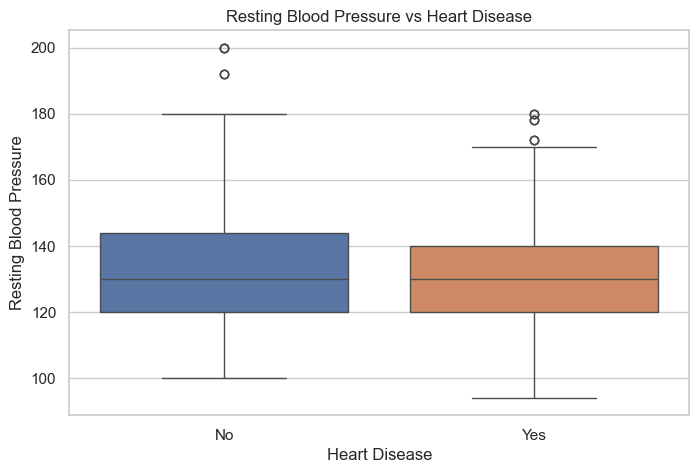

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="target", y="trestbps", hue="target", legend=False)
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Resting Blood Pressure")

### Cholesterol vs Heart Disease
Analyze cholesterol levels (`chol`) among patients

Text(0, 0.5, 'Cholesterol')

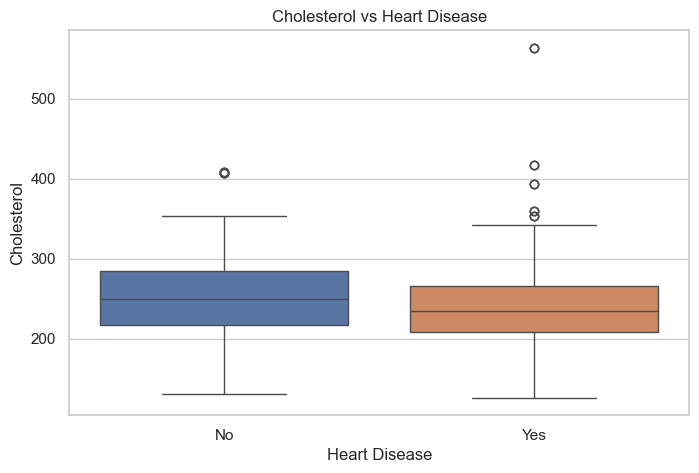

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y="chol", x="target", hue="target", legend=False)
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")

### Maximum Heart Rate Achieved vs Heart Disease
Compare maximum heart rate (`thalach`) for patients with and without disease

Text(0, 0.5, 'Maximum Heart Rate')

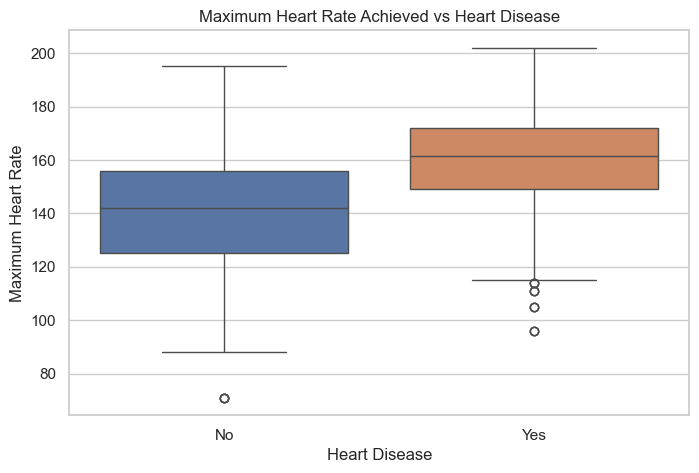

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y="thalach", x="target", hue="target", legend=False)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title("Maximum Heart Rate Achieved vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Maximum Heart Rate")


### ST Depression (oldpeak) vs Heart Disease
Analyzing exercise-induced ST depression and its association with disease

Text(0, 0.5, 'ST Depression (oldpeak)')

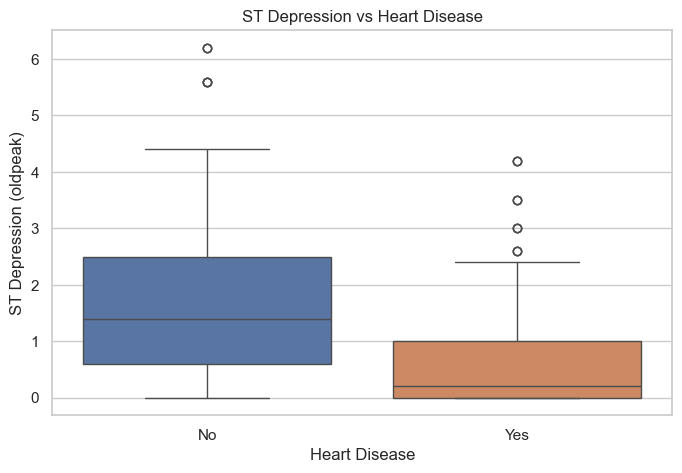

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y="oldpeak", x="target", hue="target", legend=False)
plt.title("ST Depression vs Heart Disease")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.xlabel("Heart Disease")
plt.ylabel("ST Depression (oldpeak)")


### Feature Correlation
Correlation matrix to understand relationships among features

Text(0.5, 1.0, 'Feature Correlation Matrix')

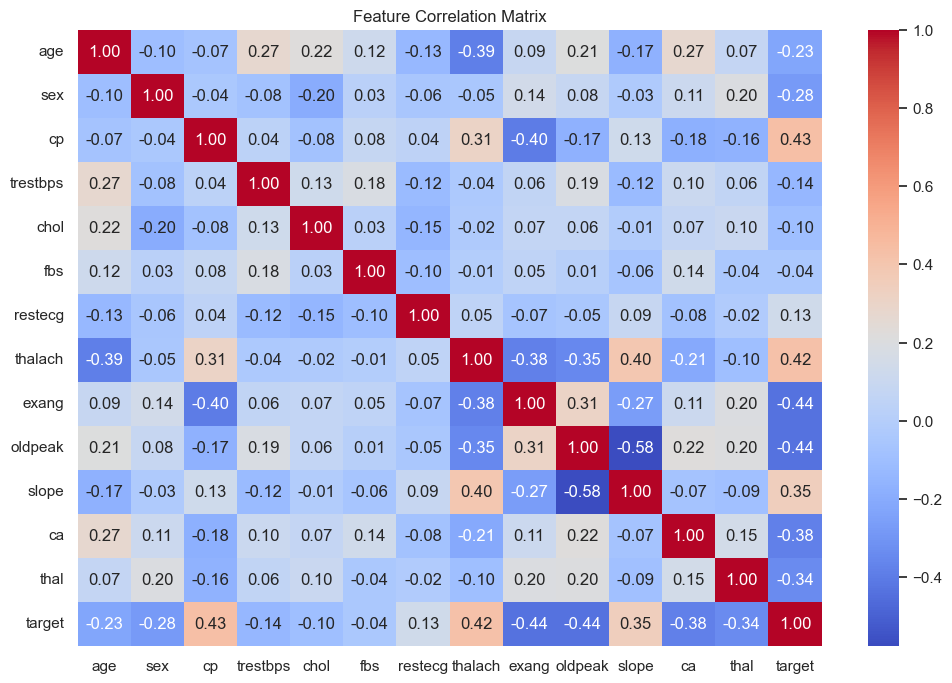

In [84]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")

### Conclusion
From this EDA, we can observe:
* __Age and chest pain type__ are strongly related to heart disease presence
* __High cholesterol and high resting blood pressure__ are risk indicators
* __Lower maximum heart rate and higher ST depression__ associate with disease
* Male patients appear slightly more at risk in this dataset
* Correlation analysis reveals features most relevant for predictive modeling